In [2]:
# analyzing physical dataset of magnetic solid based on the ISING model

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.cluster

In [4]:
numpy_array=np.load("data/ising.npz")

with np.load("data/ising.npz") as datafile:
    spins=datafile["spins"]
    temp=datafile["temp"]

In [ ]:
# knowing the data (2d slices of solid represented by arrays with 1 and -1) we
# can look at two magnetization and staggered magnetization for each slice:
# effectively reducing the dimensionality of the data

# build signmatrix for staggered magnetization
# low staggered magnetization means strong grouping of magnetic regimes (weisssche bezirke)


In [5]:
signmatrix=np.zeros((np.shape(spins)[1], np.shape(spins)[2]))
for i in range(np.shape(spins)[1]):
    for j in range(np.shape(spins)[2]):
        signmatrix[i,j]=(-1)**(i+j)

(L1,L2)=np.shape(spins[0,:,:])

magn=[]
smagn=[]
for i in range(np.shape(spins)[0]):
    magn.append(np.sum(spins[i,:,:])/(L1*L2))
    tempo=0
    for j in range(L1):
        for k in range(L2):
            tempo+=signmatrix[j,k]*spins[i,j,k]
    smagn.append(tempo/(L1*L2))

magn=np.array(magn)
smagn=np.array(smagn)

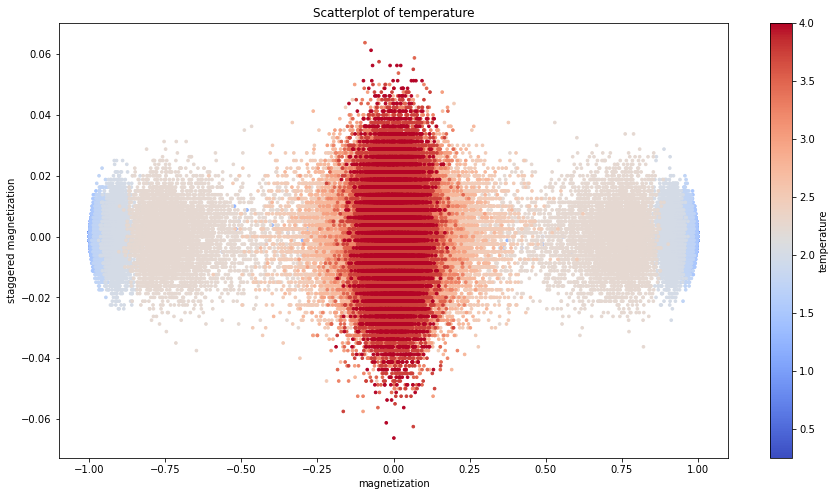

In [9]:
# visualizing the behaviour over temperature

plt.figure(figsize=(15,8))
plt.scatter(magn, smagn, c=temp, s=7, cmap='coolwarm')
plt.colorbar(label='temperature')
plt.title("Scatterplot of temperature")
plt.xlabel("magnetization")
plt.ylabel("staggered magnetization")
plt.savefig("data/plots/scatterplot_over_temperature.png")

In [10]:
# This already suggest a lot of the physical behaviour

In [7]:
# The plot suggests the use of 3 clusters

X_data=np.column_stack((magn, smagn))
cluster_model=sklearn.cluster.KMeans(n_clusters=3)
cluster_model.fit(X_data)

labels=cluster_model.labels_

c:\users\marcu\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


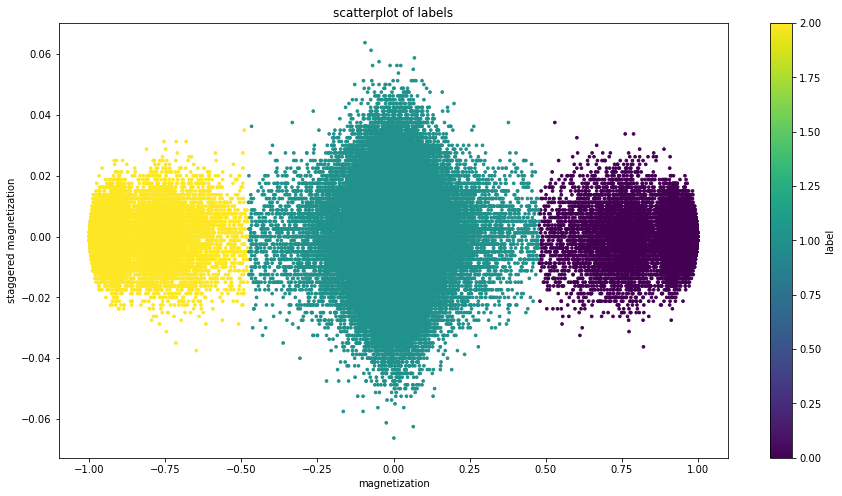

In [8]:
plt.figure(figsize=(15,8))
plt.scatter(magn, smagn, c=labels, s=7)
plt.colorbar(label="label")
plt.title("scatterplot of labels")
plt.xlabel("magnetization")
plt.ylabel("staggered magnetization")
plt.savefig("data/plots/scatterplot_over_labels.png")